# Generating a maze in Python
Date: 2021-03-01
Author: Vincent
Tags: python, MST, algorithms
Draft: false
<!--eofm-->

The following script generates a "maze" that satisfies the following condition: there is a single unique path connecting any two points. The "maze" is actually the minimal spanning tree of a grid graph with random edge weights. We find this tree by starting in an arbitrary point and then greedily add the cheapest visible edge such that we don't form any cycles. This procedure is known as Prim's algorithm.

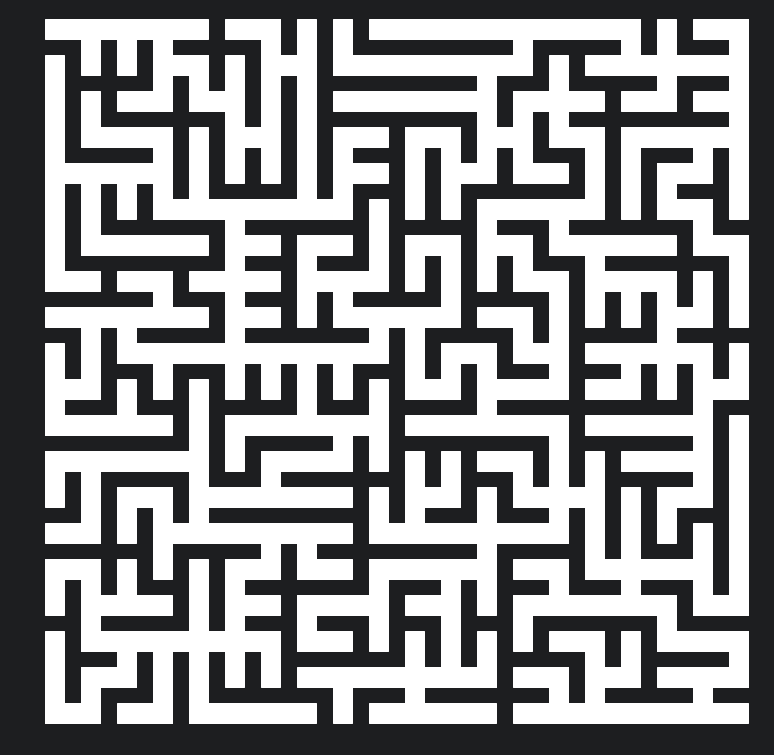

In [18]:
import numpy as np
from matplotlib.patches import Circle, Arrow, Rectangle
import matplotlib.pyplot as plt

# actually creates a rectangular grid graph with random edge-weights
# and finds a minimal spanning tree by running Prim's algorithm
def create_maze_graph(width, height):
    
    rng = np.random.default_rng()
    
    # unique integer weights! (not necessary)
    edge_weights = rng.permutation(2 * width * height - width - height)

    # weights for vertical connections
    V = np.reshape(edge_weights[:width*(height-1)],  (height-1, width))
    
    # weights for horizontal connections
    H = np.reshape(edge_weights[-(width-1)*height:], (height, width-1))

    # keep track of visited nodes
    nodes_visited = np.zeros((height, width))

    # start somewhere
    nodes_visited[0,0] = 1
    
    # let's count this as well
    n_nodes_visited = 1

    # list of edges currently in consideration
    visible_edges = [
        ((0,0), (0,1), H[0,0]), 
        ((0,0), (1,0), V[0,0])]

    edges = []

    while n_nodes_visited < width*height:

        # find cheapest visible edge and save it
        edge = min(visible_edges, key = lambda x : x[2])
        edges.append(edge)

        # where we came from
        old_node = edge[0]
        
        # where we went
        new_node = edge[1]
        nodes_visited[new_node] = 1
        n_nodes_visited += 1

        # remove edges leading in to the new node
        visible_edges = list(filter(lambda x: x[1] != new_node, visible_edges))

        # add new visible edges...
        row = new_node[0]
        col = new_node[1]
        
        # ...above?
        if row > 0:
            if not nodes_visited[(row - 1, col)]:
                visible_edges.append((new_node, (row - 1, col), V[(row - 1, col)]))
        # ...under?
        if row < height - 1:
            if not nodes_visited[(row + 1, col)]:
                visible_edges.append((new_node, (row + 1, col), V[(row, col)]))
        # ...to the left?
        if col > 0:
            if not nodes_visited[(row, col - 1)]:
                visible_edges.append((new_node, (row, col - 1), H[(row, col - 1)]))
        # ...to the right?
        if col < width - 1:
            if not nodes_visited[(row, col + 1)]:
                visible_edges.append((new_node, (row, col + 1), H[(row, col)]))
    
    return edges


# draw the maze
def plot_maze_graph(width, height, edges, r=0.27):

    fig = plt.figure(figsize=(20 * width  / ( width + height ),
                              20 * height / ( width + height )))
    fig.patch.set_facecolor('#1d1e20')
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_axis_off()
    ax.set_facecolor((0.5,0.5,0.5))

    for edge in edges:
        start = edge[0]
        end = edge[1]
        x = min(start[1], end[1]) - r + 0.5
        y = min(start[0], end[0]) - r + 0.5
        w = abs(start[1] - end[1]) + 2 * r
        h = abs(start[0] - end[0]) + 2 * r
        ax.add_patch(Rectangle((x,y), w, h, color='white'))

    plt.show()

    
# and let's generate one!
width = 20
height = 20

edges = create_maze_graph(width, height)
plot_maze_graph(width, height, edges)

Cool!